In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/steam.csv')

In [3]:
df.head(5)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [4]:
df.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price'],
      dtype='object')

# How things are changed over time

In [5]:
num_features = ['positive_rating_ratio', 'average_playtime', 'required_age', 'price']

In [6]:
df['release_year'] = df.apply(lambda row: row['release_date'].split('-')[0], axis = 1)
df['positive_rating_ratio'] = df.apply(lambda row: int(row['positive_ratings']) / ( int(row['positive_ratings']) + int(row['negative_ratings'])), axis = 1)

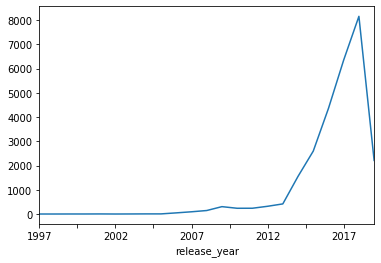

In [7]:
df.groupby(['release_year'])['appid'].count().plot()

In [8]:
df['release_year'].value_counts()

2018    8160
2017    6357
2016    4361
2015    2597
2019    2213
2014    1555
2013     418
2012     320
2009     305
2011     239
2010     238
2008     145
2007      93
2006      48
2005       6
2004       6
2001       4
2003       3
1999       2
2000       2
1998       1
2002       1
1997       1
Name: release_year, dtype: int64

We will only include data from 2008, since before that year we don't have much games.

In [9]:
df['release_year'] = df['release_year'].astype('int64')
df = df[df['release_year'] >= 2008]

In [10]:
mean_by_year = df.groupby(['release_year'])[num_features].mean()

In [11]:
mean_by_year.head(5)

,positive_rating_ratio,average_playtime,required_age,price
release_year,,,,
2008,0.754431,327.593103,0.951724,6.535241
2009,0.750293,167.606557,0.275410,6.990393
2010,0.725108,319.852941,0.882353,7.388866
2011,0.718377,359.079498,1.405858,7.527824
2012,0.756734,389.209375,1.793750,8.588562


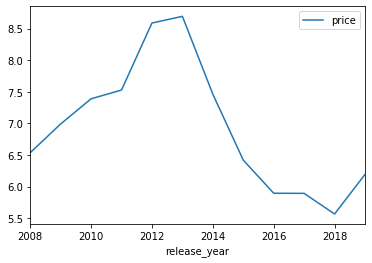

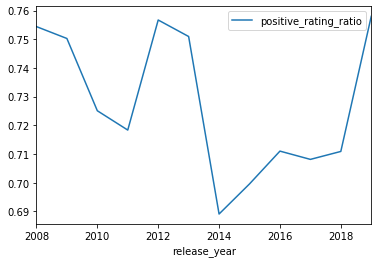

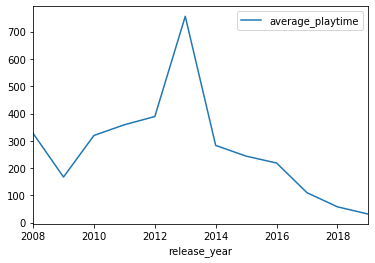

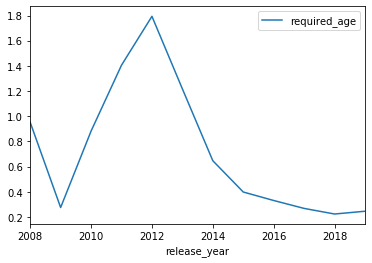

In [12]:
mean_by_year.reset_index().plot(x = 'release_year', y = 'price')
mean_by_year.reset_index().plot(x = 'release_year', y = 'positive_rating_ratio')
mean_by_year.reset_index().plot(x = 'release_year', y = 'average_playtime')
mean_by_year.reset_index().plot(x = 'release_year', y = 'required_age')

Required Age, Price and Playtime keep dropping after 2012.

## Popular genres

In [13]:
genres = pd.DataFrame(df['steamspy_tags'].str.split(';').tolist(), df['release_year']).stack().reset_index()[[0, 'release_year']]
genres.columns = ['genre', 'release_year']
genres.head()

,genre,release_year
0,FPS,2010
1,World War II,2010
2,Multiplayer,2010
3,Zombies,2008
4,Co-op,2008


In [14]:
genres['genre'].value_counts()['Indie']

16217

In [15]:
def top_ratio(col, topK = 10):
    value_counts = col.value_counts()
    top = value_counts.head(topK).index.tolist()
    total = col.count();
    ratios = [value_counts[genre] / total for genre in top]
    return dict(zip(top, ratios))

In [16]:
top_genres = genres.groupby(['release_year'])['genre'].agg(lambda col: top_ratio(col))
top_genres

release_year
2008    {'Action': 0.13170731707317074, 'Strategy': 0....
2009    {'Action': 0.12352941176470589, 'Adventure': 0...
2010    {'Action': 0.10790273556231003, 'Casual': 0.09...
2011    {'Action': 0.11587982832618025, 'Indie': 0.110...
2012    {'Indie': 0.14, 'Action': 0.12526315789473685,...
2013    {'Indie': 0.14758064516129032, 'Action': 0.109...
2014    {'Indie': 0.14744012304987913, 'Action': 0.106...
2015    {'Indie': 0.2027382833070037, 'Action': 0.1228...
2016    {'Indie': 0.20371248025276462, 'Action': 0.132...
2017    {'Indie': 0.21559307217396056, 'Action': 0.141...
2018    {'Indie': 0.23660484286450284, 'Action': 0.135...
2019    {'Indie': 0.23004918292876408, 'Action': 0.131...
Name: genre, dtype: object

In [17]:
top_genres = top_genres.to_frame()
cats = ['Action', 'Indie', 'Casual', 'Adventure', 'Simulation', 'Strategy']
for cat in cats:
    top_genres[cat] = top_genres.apply(lambda row: row['genre'][cat], axis = 1)

In [18]:
top_genres

,genre,Action,Indie,Casual,Adventure,Simulation,Strategy
release_year,,,,,,,
2008,"{'Action': 0.13170731707317074, 'Strategy': 0....",0.131707,0.043902,0.075610,0.058537,0.048780,0.075610
2009,"{'Action': 0.12352941176470589, 'Adventure': 0...",0.123529,0.058824,0.062353,0.075294,0.048235,0.072941
2010,"{'Action': 0.10790273556231003, 'Casual': 0.09...",0.107903,0.089666,0.091185,0.060790,0.041033,0.082067
2011,"{'Action': 0.11587982832618025, 'Indie': 0.110...",0.115880,0.110157,0.041488,0.060086,0.035765,0.097282
2012,"{'Indie': 0.14, 'Action': 0.12526315789473685,...",0.125263,0.140000,0.040000,0.068421,0.028421,0.065263
2013,"{'Indie': 0.14758064516129032, 'Action': 0.109...",0.109677,0.147581,0.045161,0.066129,0.037097,0.070161
2014,"{'Indie': 0.14744012304987913, 'Action': 0.106...",0.106570,0.147440,0.067018,0.094924,0.042848,0.058668
2015,"{'Indie': 0.2027382833070037, 'Action': 0.1228...",0.122828,0.202738,0.077278,0.096893,0.038310,0.060032
2016,"{'Indie': 0.20371248025276462, 'Action': 0.132...",0.132227,0.203712,0.099289,0.103239,0.044550,0.050711


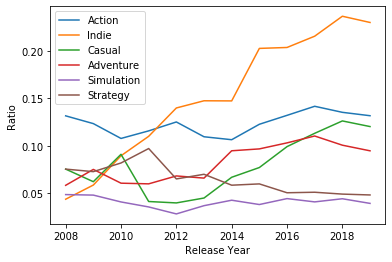

In [19]:
fig,ax = plt.subplots()
for cat in cats:
    ax.plot(top_genres.index, top_genres[cat], label = cat)
ax.set_xlabel("Release Year")
ax.set_ylabel("Ratio")
ax.legend(loc='best')

We can see a rise in Indie games.

## Catagories

In [20]:
cats = pd.DataFrame(df['categories'].str.split(';').tolist(), df['release_year']).stack().reset_index()[[0, 'release_year']]
cats.columns = ['categories', 'release_year']
cats.head()

,categories,release_year
0,Multi-player,2010
1,Cross-Platform Multiplayer,2010
2,Steam Achievements,2010
3,Steam Trading Cards,2010
4,Valve Anti-Cheat enabled,2010


In [21]:
top_cats = cats.groupby(['release_year'])['categories'].agg(lambda col: top_ratio(col, topK = 20))
top_cats = top_cats.to_frame()
top_cats

,categories
release_year,
2008,"{'Single-player': 0.5088967971530249, 'Multi-p..."
2009,"{'Single-player': 0.44624447717231225, 'Multi-..."
2010,"{'Single-player': 0.33285302593659943, 'Steam ..."
2011,"{'Single-player': 0.2544444444444444, 'Steam A..."
2012,"{'Single-player': 0.23974255832662913, 'Steam ..."
2013,"{'Single-player': 0.2012072434607646, 'Steam A..."
2014,"{'Single-player': 0.25598904859685145, 'Steam ..."
2015,"{'Single-player': 0.24038834951456312, 'Steam ..."
2016,"{'Single-player': 0.2524957389822255, 'Steam A..."


In [22]:
feats = ['Single-player', 'Steam Achievements', 'Steam Cloud', 'Steam Trading Cards', 'Multi-player', 'Partial Controller Support']
for feat in feats:
    top_cats[feat] = top_cats.apply(lambda row: row['categories'][feat], axis = 1)

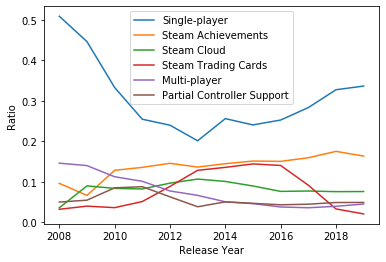

In [23]:
fig,ax = plt.subplots()
for feat in feats:
    ax.plot(top_cats.index, top_cats[feat], label = feat)
ax.set_xlabel("Release Year")
ax.set_ylabel("Ratio")
ax.legend(loc='best')

## Top Games

Game with most positive ratings

In [24]:
top_games = df.groupby(['release_year']).apply(lambda x: x.nlargest(1,['positive_ratings']))

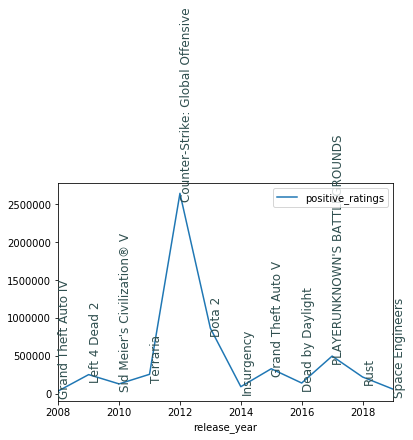

In [56]:
fig, ax = plt.subplots()
top_games.plot(x = 'release_year', y = 'positive_ratings', ax=ax)
for index, row in top_games.iterrows():
    ax.annotate(row['name'], row[['release_year', 'positive_ratings']], xytext=(0,-5), textcoords='offset points',
                family='sans-serif', fontsize=12, color='darkslategrey', rotation = 90)

Game with longest mean play time

In [43]:
longest_games = df.groupby(['release_year']).apply(lambda x: x.nlargest(1,['average_playtime']))

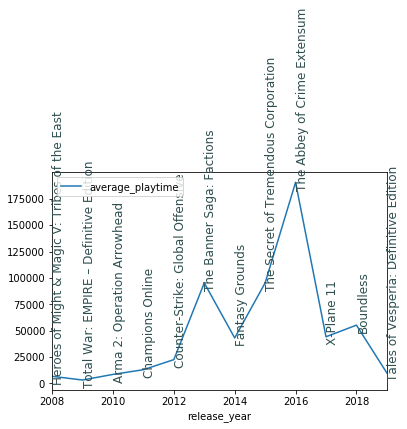

In [57]:
fig, ax = plt.subplots()
longest_games.plot(x = 'release_year', y = 'average_playtime', ax=ax)
for index, row in longest_games.iterrows():
    ax.annotate(row['name'], row[['release_year', 'average_playtime']], xytext=(0,-5), textcoords='offset points',
                family='sans-serif', fontsize=12, color='darkslategrey', rotation = 90)